In [1]:
import pandas as pd
import hddm
import kabuki
from glob import glob
import matplotlib.pyplot as plt
from p_tqdm import p_map
from functools import partial

In [2]:
data = pd.read_csv('~/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/data.csv')

In [3]:
data

,...1,Unnamed: 0,subj_idx,stimulus,response,rt,condition,response_corr,image_index,coherency,spatial,cpp
0,0,0,1,1,1,0.529206,1,1,19,High,Yes,4.720000e-07
1,1,1,1,0,0,0.519501,2,1,12,High,No,4.720000e-07
2,2,2,1,1,1,0.611204,2,1,20,High,No,4.720000e-07
3,3,3,1,0,0,0.465089,1,1,5,High,Yes,4.720000e-07
4,4,4,1,0,0,0.367166,1,1,13,High,Yes,4.720000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3974,279,17,0,0,0.309091,3,1,41,Low,Yes,1.840000e-06
3975,3975,280,17,0,0,0.261170,3,1,45,Low,Yes,1.840000e-06
3976,3976,281,17,1,0,0.271483,3,0,63,Low,Yes,1.840000e-06
3977,3977,282,17,0,0,0.283706,4,1,40,Low,No,1.840000e-06


In [4]:
def model5(id, data, samples, burn, thin):
    
    print('running model%i'%id)
    
    dbname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model5_%i.db'%id
    fname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model5_%i'%id
    
    model = hddm.HDDMRegressor(data, ['v ~ cpp:C(coherency)',
                                      't ~ spatial'])
    model.find_starting_values()
    model.sample(samples,
                 burn = burn,
                 dbname = dbname,
                 db='pickle',
                 thin = thin)
    model.save(fname)
    
    return model

In [5]:
chains = 8
samples = 1000
burn = 100
thin = 1

In [6]:
models_1 = p_map(partial(model5, 
                         data = data, 
                         samples = samples,
                         burn = burn,
                         thin = thin),
                 range(chains))

running model0

  0%|          | 0/8 [00:00<?, ?it/s]


() running model1
No model attribute --> setting up standard HDDM
Includes supplied: 
running model2
Set model to ddm
Reg Model:
{'outcome': 'v', 'model': ' cpp:C(coherency)', 'params': ['v_Intercept', 'v_cpp:C(coherency)[High]', 'v_cpp:C(coherency)[Low]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7f1b5505a820>}
No model attribute --> setting up standard HDDMUses Identity Link

Includes supplied: Reg Model:
 running model3{'outcome': 't', 'model': ' spatial', 'params': ['t_Intercept', 't_spatial[T.Yes]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7f1b5505ae50>}
Uses Identity Link

()
No model attribute --> setting up standard HDDM
Set model to ddmIncludes supplied: running model4

 Reg Model:()

{'outcome': 'v', 'model': ' cpp:C(coherency)', 'params': ['v_Intercept', 'v_cpp:C(coherency)[High]', 'v_cpp:C(coherency)[Low]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7f1b5505a820>}No model attribute --> sett

/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-pack

 -----------------75%--------          ] 759 of 1000 complete in 36316.0 sec               0%                  ] 2 of 1000 complete in 15.6 sec[                  0%                  ] 2 of 1000 complete in 22.8 sec[                  0%                  ] 2 of 1000 complete in 22.7 sec[                  0%                  ] 2 of 1000 complete in 27.2 sec[                  0%                  ] 3 of 1000 complete in 37.2 sec[                  0%                  ] 3 of 1000 complete in 38.0 sec[                  0%                  ] 2 of 1000 complete in 39.4 sec[                  0%                  ] 2 of 1000 complete in 41.8 sec[                  0%                  ] 2 of 1000 complete in 44.7 sec[                  0%                  ] 3 of 1000 complete in 46.2 sec[                  0%                  ] 3 of 1000 complete in 47.1 sec[                  0%                  ] 3 of 1000 complete in 57.1 sec[                  0%                  ] 4 of 1000 complete in 71.9 sec[    

In [10]:
rubin_1 = hddm.analyze.gelman_rubin(models_1)
rubin_1

{'a': 1.0006540264035528,
 'a_std': 1.0016221269739056,
 'a_subj.1': 1.0022350853810655,
 'a_subj.3': 1.0005523339307478,
 'a_subj.4': 1.000224457688728,
 'a_subj.5': 1.0011616360063316,
 'a_subj.6': 1.0023077658740611,
 'a_subj.8': 1.0009946696492218,
 'a_subj.9': 1.0341077000075911,
 'a_subj.10': 0.9995854304711846,
 'a_subj.12': 1.00055621525798,
 'a_subj.13': 1.001168381838828,
 'a_subj.14': 1.000237299158122,
 'a_subj.15': 1.001270069055349,
 'a_subj.16': 1.0002565514766069,
 'a_subj.17': 1.0018002988557388,
 'v_Intercept': 1.0023204249963156,
 'v_Intercept_std': 1.0304541037070785,
 'v_Intercept_subj.1': 1.004559202415917,
 'v_Intercept_subj.3': 1.0027624650720228,
 'v_Intercept_subj.4': 1.005333503987243,
 'v_Intercept_subj.5': 1.0007428773271825,
 'v_Intercept_subj.6': 1.0002136384353255,
 'v_Intercept_subj.8': 1.002774830622921,
 'v_Intercept_subj.9': 1.0022567889365546,
 'v_Intercept_subj.10': 1.0023392740561357,
 'v_Intercept_subj.12': 1.0027311961943188,
 'v_Intercept_subj.

In [11]:
models_5_comb = kabuki.utils.concat_models(models_1)

Reg Model:
{'outcome': 'v', 'model': ' cpp:C(coherency)', 'params': ['v_Intercept', 'v_cpp:C(coherency)[High]', 'v_cpp:C(coherency)[Low]'], 'link_func': <function <lambda> at 0x7f1b52686700>}
Uses Identity Link
Reg Model:
{'outcome': 't', 'model': ' spatial', 'params': ['t_Intercept', 't_spatial[T.Yes]'], 'link_func': <function <lambda> at 0x7f1b5265c310>}
Uses Identity Link


Plotting a
Plotting a_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_cpp:C(coherency)[High]
Plotting v_cpp:C(coherency)[Low]
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_spatial[T.Yes]


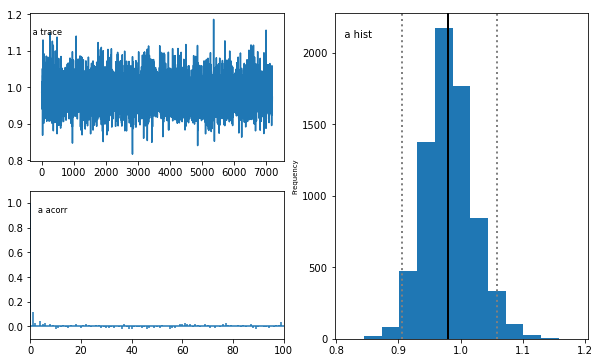

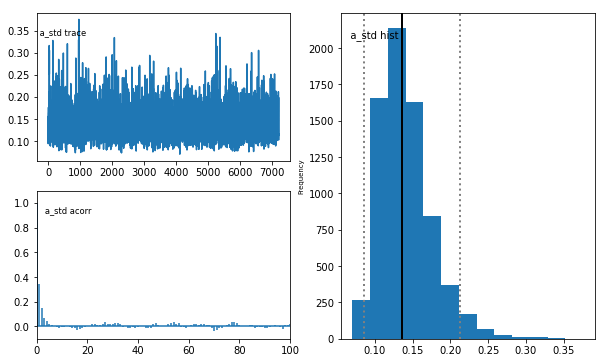

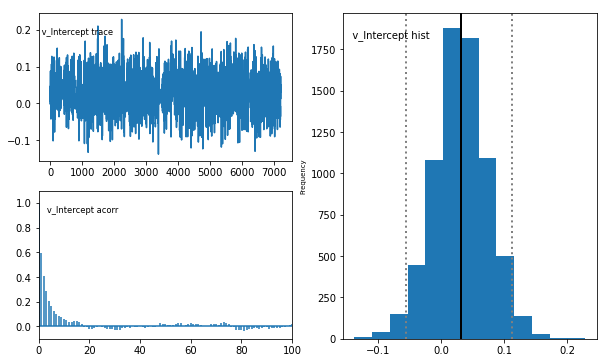

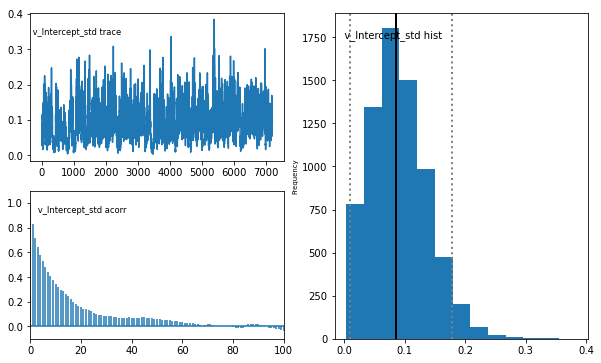

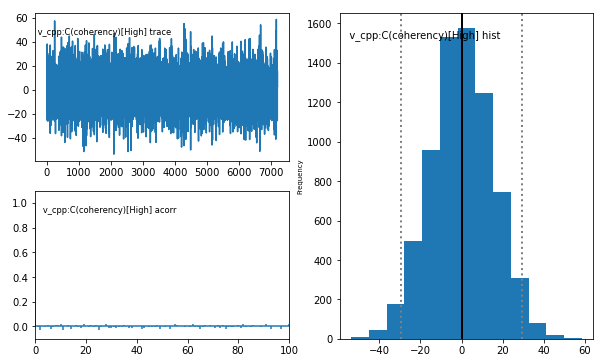

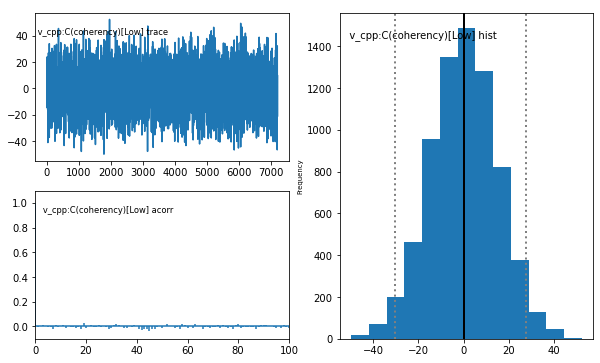

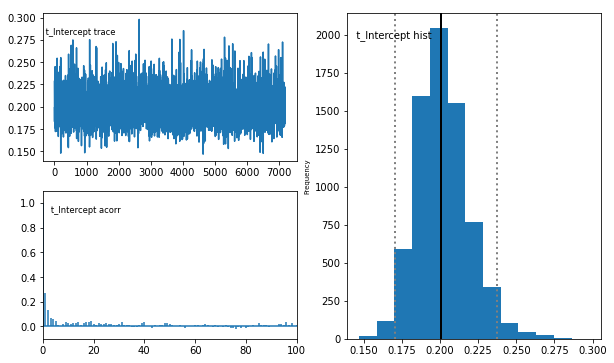

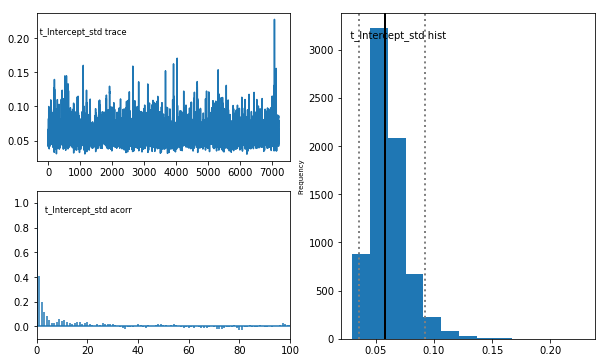

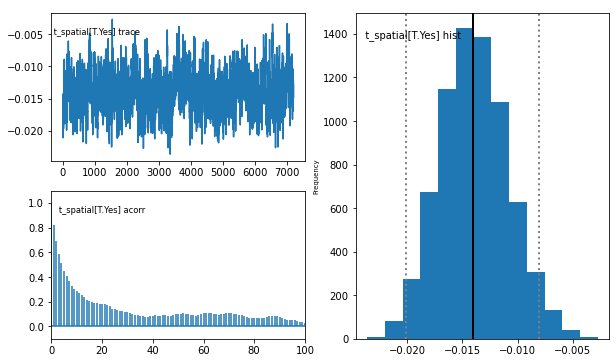

In [12]:
models_5_comb.plot_posteriors()

In [16]:
models_5_comb.dic

1329.6684546644296

In [17]:
models_5_comb.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,0.981724,0.0391978,0.90925,0.955809,0.980126,1.00568,1.06444,0.000499317
a_std,0.141163,0.0347012,0.0909477,0.116386,0.135511,0.159163,0.223619,0.0006346
a_subj.1,0.931032,0.0272652,0.879827,0.912385,0.930741,0.948853,0.987424,0.000541225
a_subj.3,1.11621,0.034804,1.05007,1.09206,1.11596,1.13942,1.18591,0.000654662
a_subj.4,0.987156,0.0273246,0.935588,0.968474,0.987136,1.00504,1.04298,0.000449212
a_subj.5,0.89505,0.0329414,0.838797,0.872524,0.89118,0.913957,0.969454,0.000844424
a_subj.6,1.10668,0.0311446,1.04691,1.08528,1.10611,1.12764,1.16755,0.000550868
a_subj.8,0.859983,0.023939,0.814732,0.843604,0.859607,0.875626,0.907953,0.000444973
a_subj.9,0.872973,0.0508941,0.79622,0.832923,0.860664,0.916501,0.972018,0.00311401
a_subj.10,0.823278,0.0235184,0.779152,0.80694,0.822927,0.838793,0.87023,0.000368877


Text(0.5, 0, 'drift rate coeffecient in ')

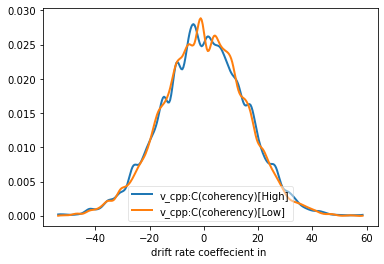

In [12]:
v2, v3 = models_5_comb.nodes_db.node[[ 'v_cpp:C(coherency)[High]','v_cpp:C(coherency)[Low]']]
hddm.analyze.plot_posterior_nodes([v2, v3])
plt.xlabel('drift rate coeffecient in ')
# plt.savefig('hddm_demo_fig_06.pdf')

In [2]:
models_5_comb = []
for model_path in glob('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model5_*'):
    if ('db' not in model_path) and ('csv' not in model_path):
        print(model_path)
        modelx = hddm.load(model_path)
        models_5_comb.append(modelx)

/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model5_0
Reg Model:
{'outcome': 'v', 'model': ' cpp:C(coherency)', 'params': ['v_Intercept', 'v_cpp:C(coherency)[High]', 'v_cpp:C(coherency)[Low]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fc42d3641f0>}
Uses Identity Link
Reg Model:
{'outcome': 't', 'model': ' spatial', 'params': ['t_Intercept', 't_spatial[T.Yes]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fc42c286d30>}
Uses Identity Link
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model5_1
Reg Model:
{'outcome': 'v', 'model': ' cpp:C(coherency)', 'params': ['v_Intercept', 'v_cpp:C(coherency)[High]', 'v_cpp:C(coherency)[Low]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fc3b16d3820>}
Uses Identity Link
Reg Model:
{'outcome': 't', 'model': ' spatial', 'params': ['t_Intercept', 't_spatial[T.Yes]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fc3b16b24c0

In [3]:
models_5_comb = kabuki.utils.concat_models(models_5_comb)

Reg Model:
{'outcome': 'v', 'model': ' cpp:C(coherency)', 'params': ['v_Intercept', 'v_cpp:C(coherency)[High]', 'v_cpp:C(coherency)[Low]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fc42d3641f0>}
Uses Identity Link
Reg Model:
{'outcome': 't', 'model': ' spatial', 'params': ['t_Intercept', 't_spatial[T.Yes]'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fc42c286d30>}
Uses Identity Link


In [6]:
models_5_comb.get_traces().columns

Index(['a', 'a_std', 'a_subj.1', 'a_subj.3', 'a_subj.4', 'a_subj.5',
       'a_subj.6', 'a_subj.8', 'a_subj.9', 'a_subj.10', 'a_subj.12',
       'a_subj.13', 'a_subj.14', 'a_subj.15', 'a_subj.16', 'a_subj.17',
       'v_Intercept', 'v_Intercept_std', 'v_Intercept_subj.1',
       'v_Intercept_subj.3', 'v_Intercept_subj.4', 'v_Intercept_subj.5',
       'v_Intercept_subj.6', 'v_Intercept_subj.8', 'v_Intercept_subj.9',
       'v_Intercept_subj.10', 'v_Intercept_subj.12', 'v_Intercept_subj.13',
       'v_Intercept_subj.14', 'v_Intercept_subj.15', 'v_Intercept_subj.16',
       'v_Intercept_subj.17', 'v_cpp:C(coherency)[High]',
       'v_cpp:C(coherency)[Low]', 't_Intercept', 't_Intercept_std',
       't_Intercept_subj.1', 't_Intercept_subj.3', 't_Intercept_subj.4',
       't_Intercept_subj.5', 't_Intercept_subj.6', 't_Intercept_subj.8',
       't_Intercept_subj.9', 't_Intercept_subj.10', 't_Intercept_subj.12',
       't_Intercept_subj.13', 't_Intercept_subj.14', 't_Intercept_subj.15',
      